## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Random Forest Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('ASIALNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Main

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/ASIALNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,ASIALNG,ASIALNG_LAG,Equity Market Volatility,Economic Policy Uncertainty Europe,NY Business Conditions,3 Month Treasury Bill,Infectious Disease Tracker,Nickel,COV19,RUWAR
DATE,,,,,,,,,,
2001-10-01,0.004310,-0.021368,22.46,141.35,-4.5,-0.72,0.39,-0.088497,0,0
2001-11-01,-0.163152,0.004310,-13.09,-10.39,-2.2,-0.48,-0.06,-0.045894,0,0
2001-12-01,-0.070803,-0.163152,-2.94,-39.39,-6.8,-0.29,0.09,0.060355,0,0
2002-01-01,-0.030347,-0.070803,-2.04,-53.76,11.7,-0.18,-0.39,0.035324,0,0
2002-02-01,0.019418,-0.030347,4.29,-5.87,11.2,-0.04,0.29,0.131247,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.020990,-0.193205,2.93,21.28,-42.6,0.22,2.32,-0.071308,1,1
2023-07-01,0.073401,0.020990,-5.14,-18.30,38.4,0.02,-2.45,-0.041580,1,1
2023-08-01,0.076927,0.073401,-0.72,16.36,-5.5,0.09,-0.81,-0.006711,1,1


In [4]:
import statsmodels.api as sm


y = df['ASIALNG']
X = df[["ASIALNG_LAG","Equity Market Volatility","Economic Policy Uncertainty Europe","NY Business Conditions","3 Month Treasury Bill","Infectious Disease Tracker","Nickel","COV19","RUWAR"]]

# Add a constant term to the feature matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ASIALNG   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.511
Date:                Sat, 13 Jan 2024   Prob (F-statistic):            0.00904
Time:                        15:32:33   Log-Likelihood:                 138.11
No. Observations:                 265   AIC:                            -256.2
Df Residuals:                     255   BIC:                            -220.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0013      0.010      0.130      0.897      -0.018       0.021
ASIALNG_LAG                            0.1583      0.062      2.549      0.011       0.036       0.281
Equity Market Volatility               0.0003      0.001      0.222      0.824      -0.002       0.003
Economic Policy Uncertainty Europe    -0.0002      0.000     -1.034      0.302      -0.001       0.000
NY Business Conditions                 0.0006      0.001      0.799      0.425      -0.001       0.002
3 Month Treasury Bill                  0.0759      0.055      1.380      0.169      -0.032       0.184
Infectious Disease Tracker            -0.0046      0.003     -1.701      0.090      -0.010       0.001
Nickel                                 0.0467      0.107      0.437      0.663      -0.164       0.257
COV19                                  0.0552      0.031      1.754      0.081      -0.007       0.117
RUWAR                                 -0.0950      0.047     -2.000      0.047      -0.189      -0.001
==============================================================================
Omnibus:                      170.633   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3417.650
Skew:                          -2.173   Prob(JB):                         0.00
Kurtosis:                      20.048   Cond. No.                         529.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Droping columns with P > 0.1

In [5]:
selected_columns = ["ASIALNG","ASIALNG_LAG","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,ASIALNG,ASIALNG_LAG,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,
2001-10-01,0.004310,-0.021368,0.39,0,0
2001-11-01,-0.163152,0.004310,-0.06,0,0
2001-12-01,-0.070803,-0.163152,0.09,0,0
2002-01-01,-0.030347,-0.070803,-0.39,0,0
2002-02-01,0.019418,-0.030347,0.29,0,0
...,...,...,...,...,...
2023-06-01,0.020990,-0.193205,2.32,1,1
2023-07-01,0.073401,0.020990,-2.45,1,1
2023-08-01,0.076927,0.073401,-0.81,1,1


## Tree

In [6]:
# Splitting the data into train and test sets
train, test = train_test_split(pruned_df, test_size=0.09, shuffle=False)

# Defining features and target
features = ["ASIALNG_LAG","Infectious Disease Tracker","COV19","RUWAR"]
target = "ASIALNG"

In [7]:
# RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Hyperparameters range for Randomized Search
param_distributions = {
    'n_estimators': [100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, n_iter=500, cv=5, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(train[features], train[target])

# Best model from random search
best_model = random_search.best_estimator_

test['PREDICTED_ASIALNG'] = best_model.predict(test[features])

# Outputting the best parameters
best_params = random_search.best_params_
best_params

C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 324 is smaller than n_iter=500. Running 324 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

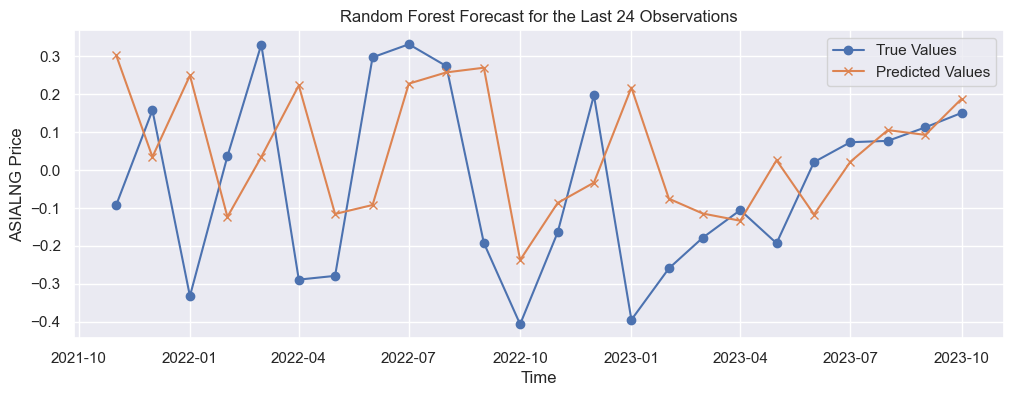

In [8]:
plotFor(test['ASIALNG'],test['PREDICTED_ASIALNG'])

In [9]:
y_test = test['ASIALNG']
predictions = test['PREDICTED_ASIALNG']

In [10]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.2112
MAPE: 136.3037 %
MSE: 0.0777
RMSE: 0.2788


## Saving Prediction

In [11]:
df = pd.DataFrame({'ASIALNG M RF': predictions, 'Actual': y_test})
df.to_excel("ASIALNG_M_RF_forecast.xlsx", index=True)
df

,ASIALNG M RF,Actual
DATE,,
2021-11-01,0.303217,-0.092861
2021-12-01,0.034609,0.157720
2022-01-01,0.249496,-0.332685
2022-02-01,-0.123691,0.036235
2022-03-01,0.034516,0.331117
2022-04-01,0.223263,-0.289232
2022-05-01,-0.116004,-0.279329
2022-06-01,-0.092270,0.297434
2022-07-01,0.228000,0.331965


In [12]:
# Open a file in write mode
with open('ASIALNG M RF Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')